In [2]:
!pwd

/home/marciano/Desktop/quality-control-segmentation/multi-organ-QC/multi_organ_qc/notebooks


In [7]:
%cd ..

/home/marciano/Desktop/quality-control-segmentation/multi-organ-QC


In [10]:
import os
import nibabel as nib
import numpy as np
import torch

from utils.testing import display_image, display_difference


DATA_PATH = 'data/liver/'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
test_ids = np.load(os.path.join(DATA_PATH,'saved_ids.npy'), allow_pickle=True).item().get('train_ids')

In [14]:
len(test_ids)

91

Selected patient is Patient N°088


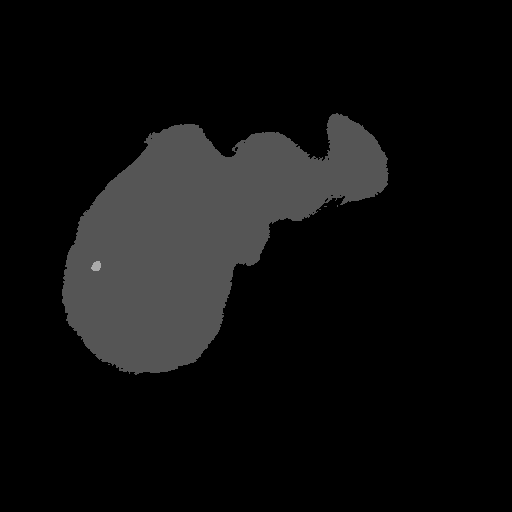

Selected patient is Patient N°010


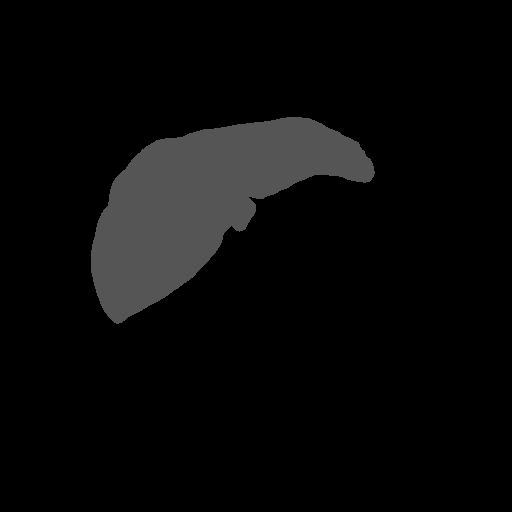

Selected patient is Patient N°118


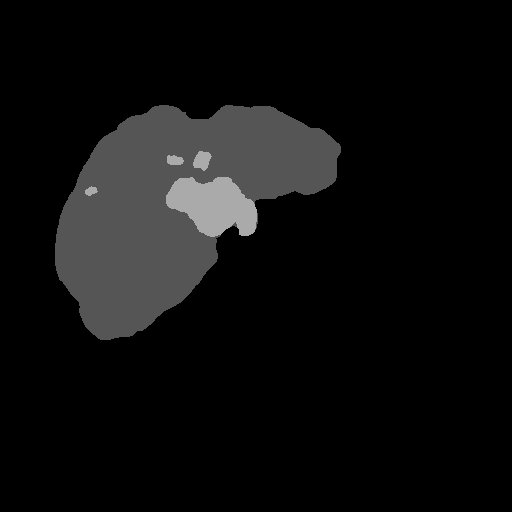

Selected patient is Patient N°092


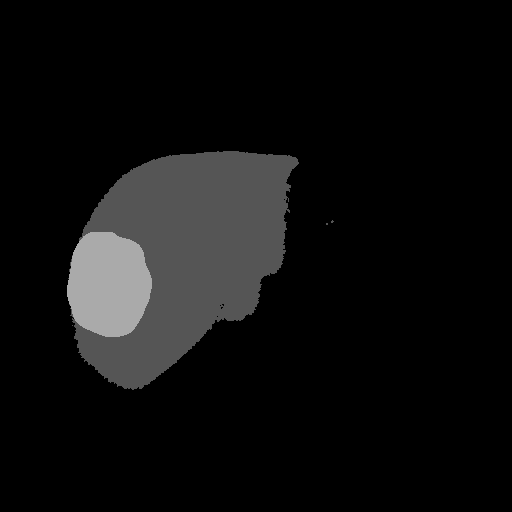

Selected patient is Patient N°076


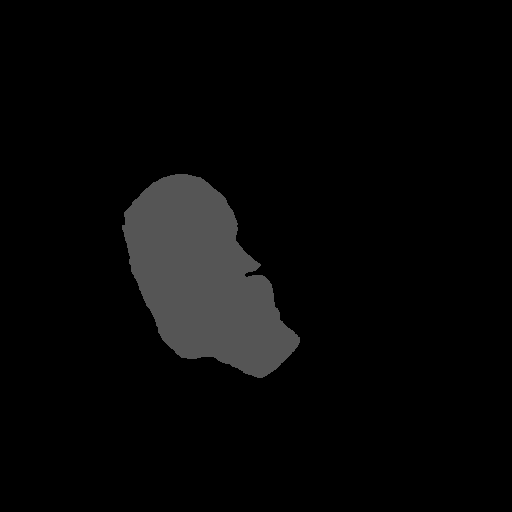

Selected patient is Patient N°103


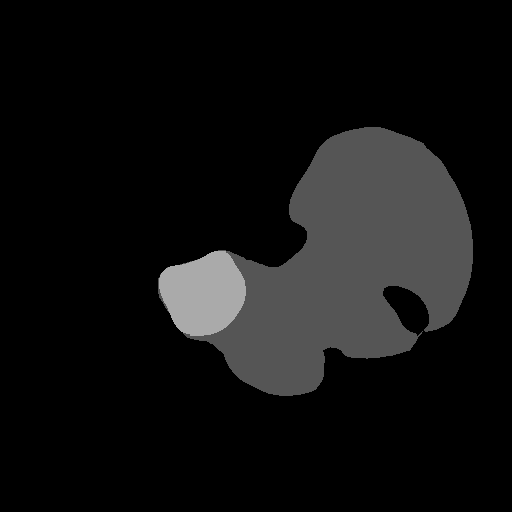

Selected patient is Patient N°043


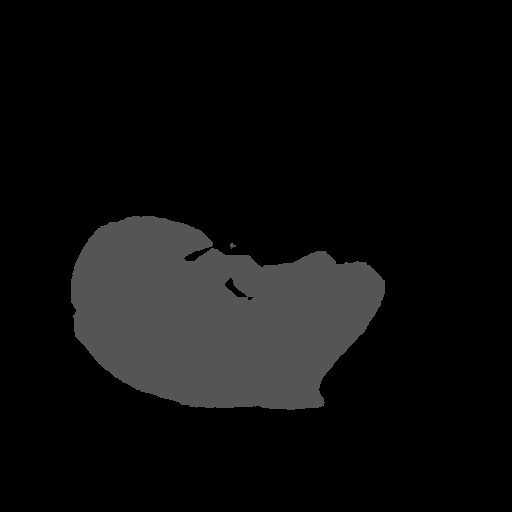

Selected patient is Patient N°095


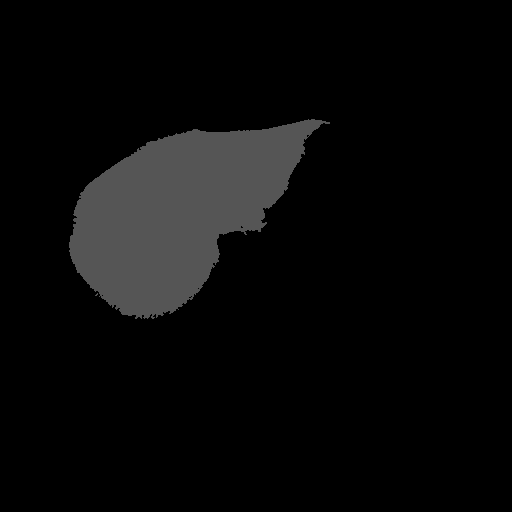

Selected patient is Patient N°001


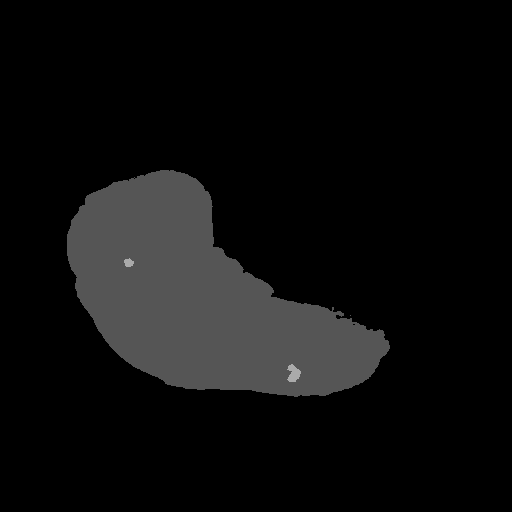

Selected patient is Patient N°025


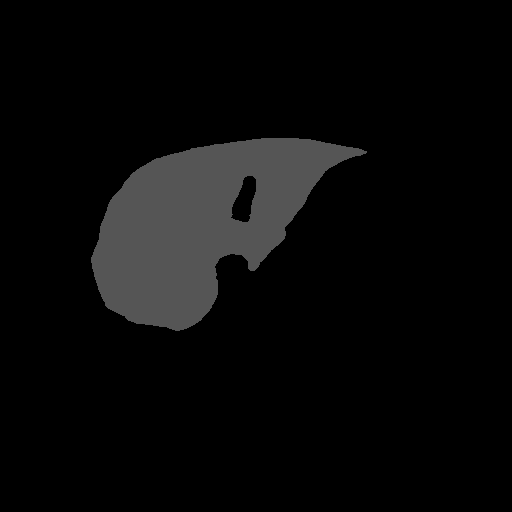

Selected patient is Patient N°064


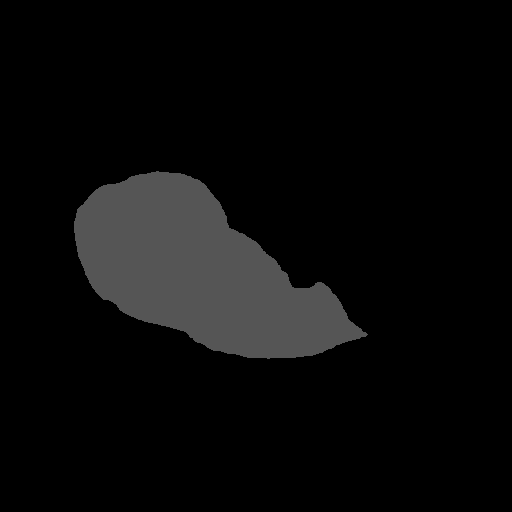

Selected patient is Patient N°078


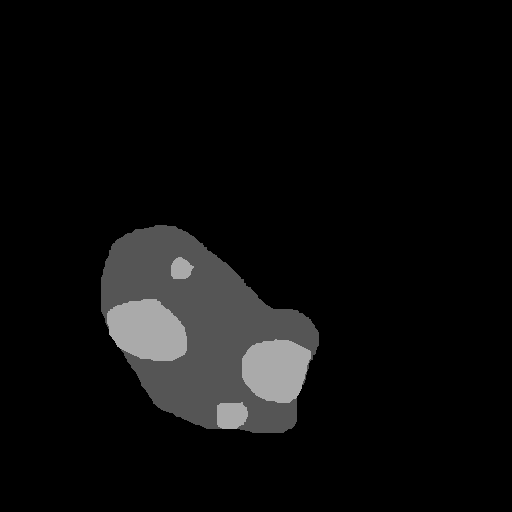

Selected patient is Patient N°037


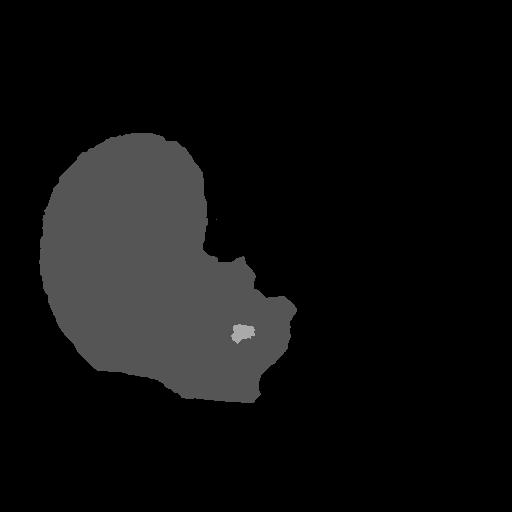

Selected patient is Patient N°000


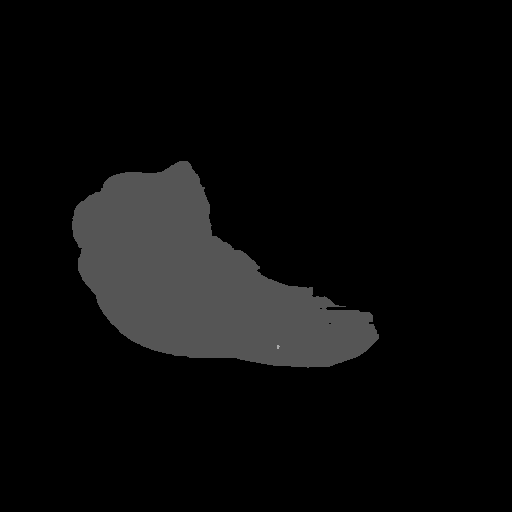

Selected patient is Patient N°054


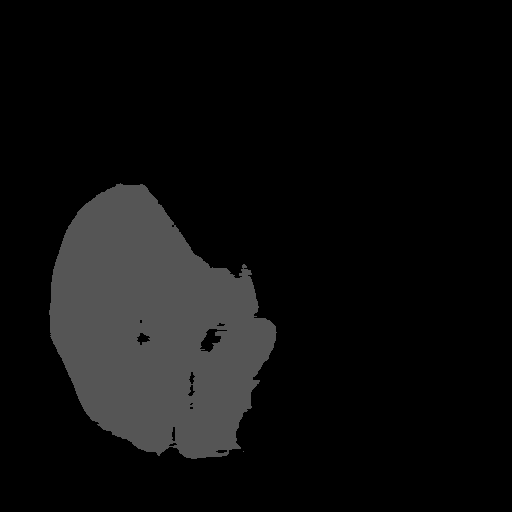

Selected patient is Patient N°091


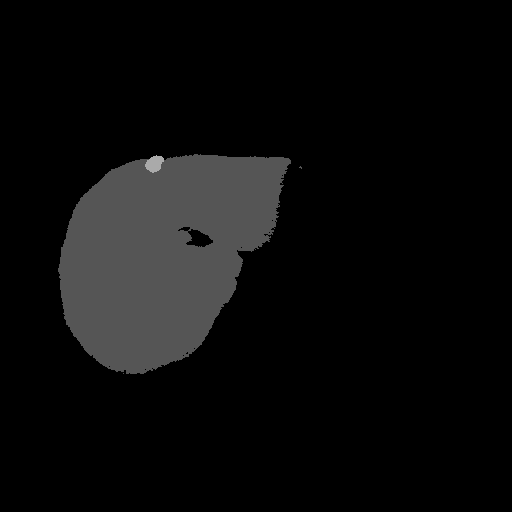

Selected patient is Patient N°068


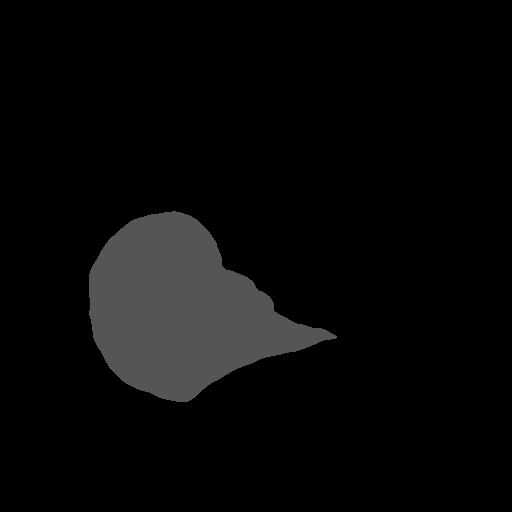

Selected patient is Patient N°029


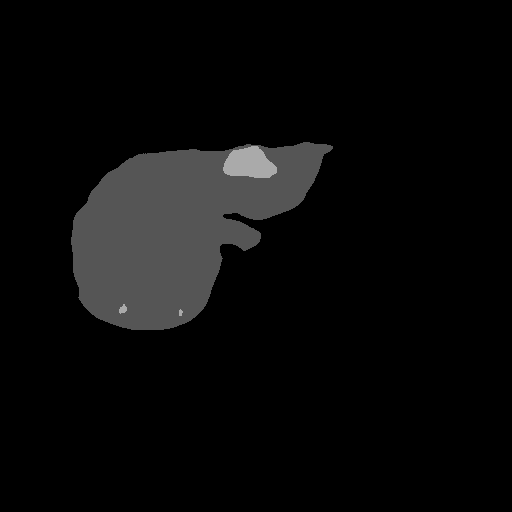

Selected patient is Patient N°018


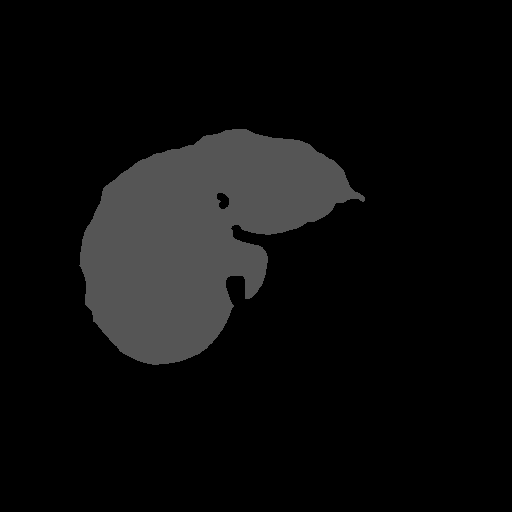

Selected patient is Patient N°102


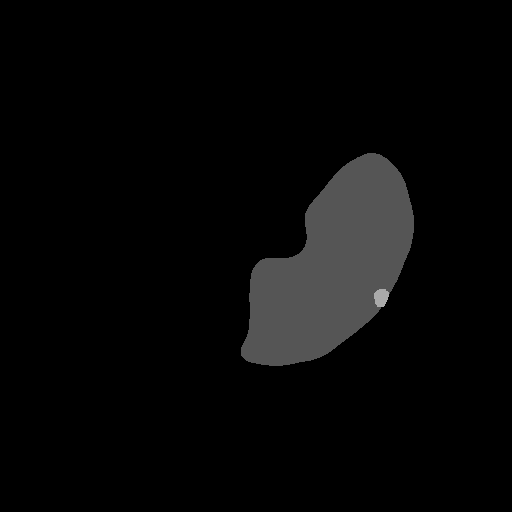

Selected patient is Patient N°093


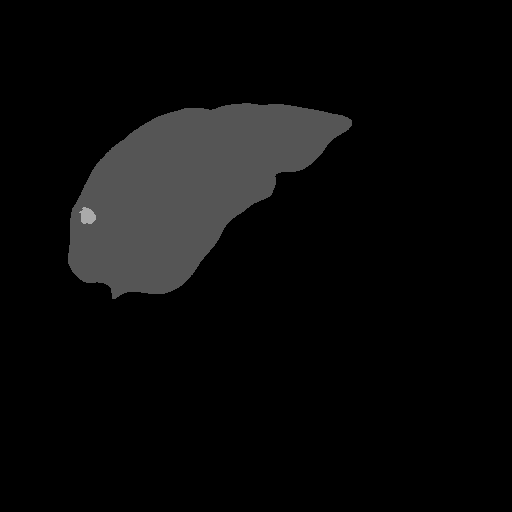

Selected patient is Patient N°038


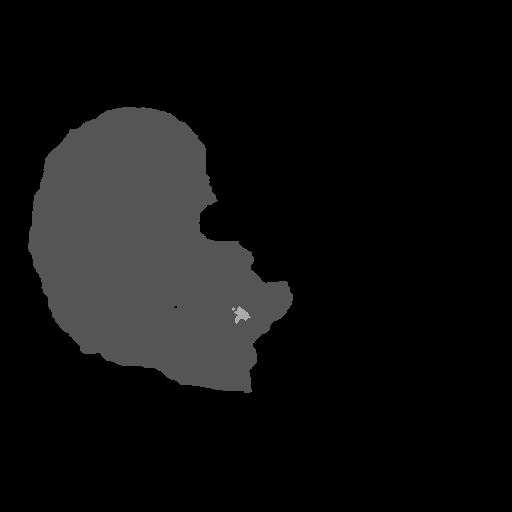

Selected patient is Patient N°028


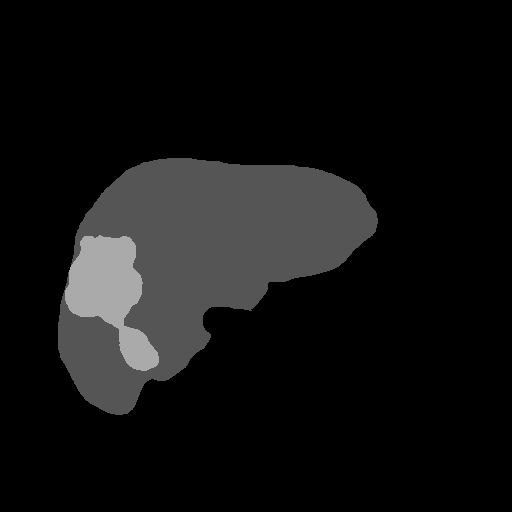

Selected patient is Patient N°035


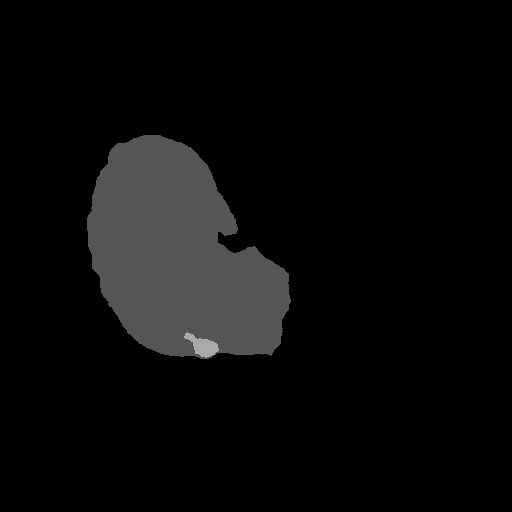

Selected patient is Patient N°051


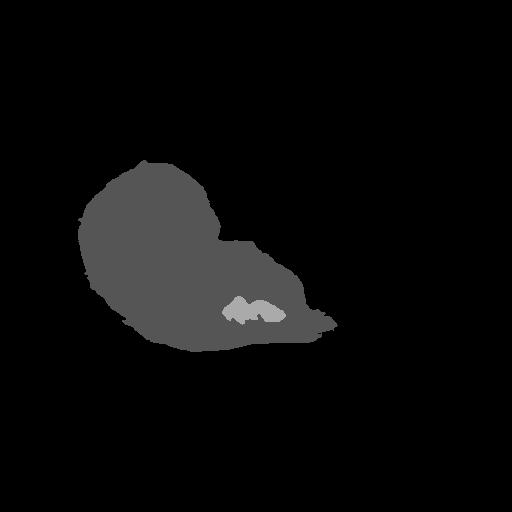

Selected patient is Patient N°090


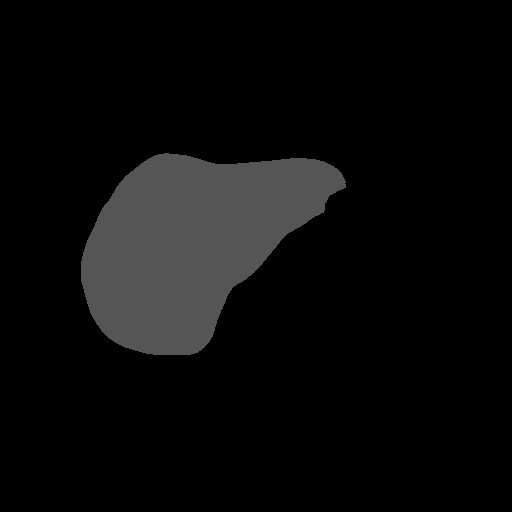

Selected patient is Patient N°115


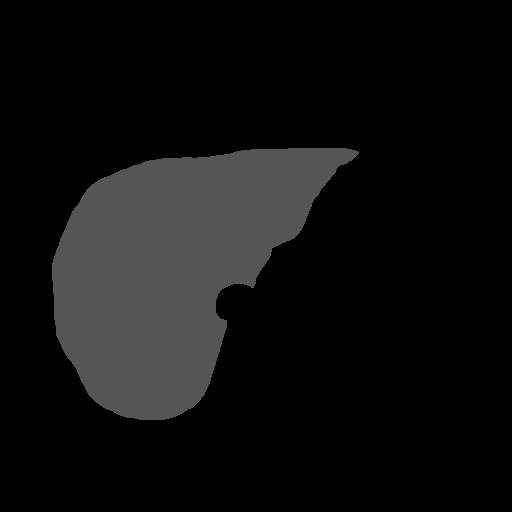

Selected patient is Patient N°108


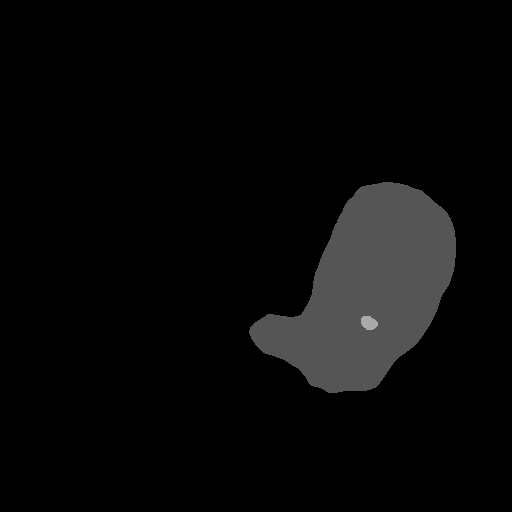

Selected patient is Patient N°121


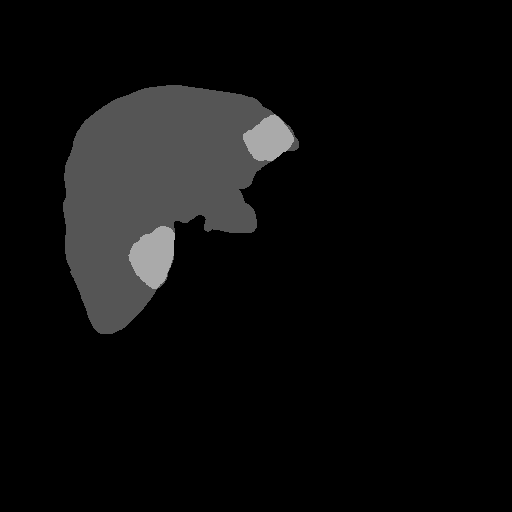

Selected patient is Patient N°114


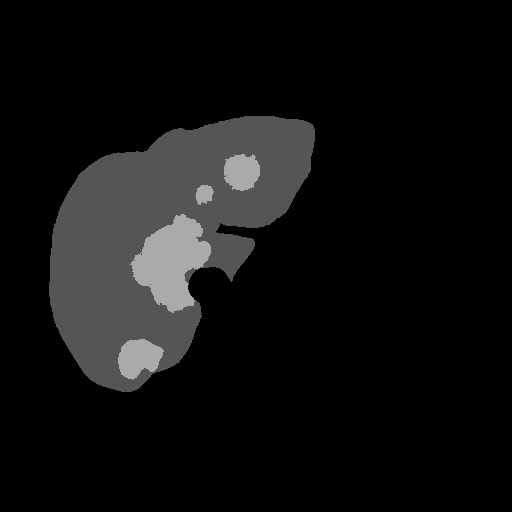

Selected patient is Patient N°016


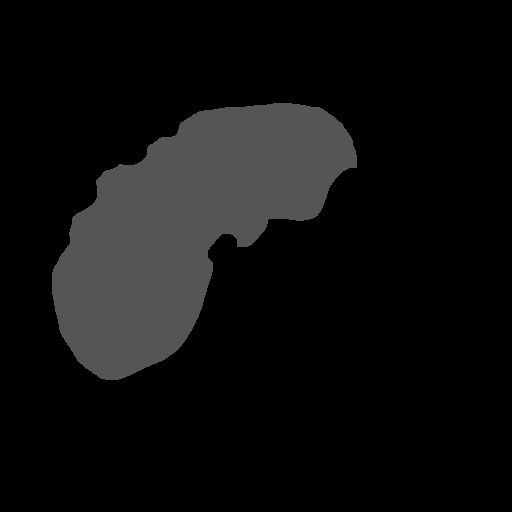

Selected patient is Patient N°004


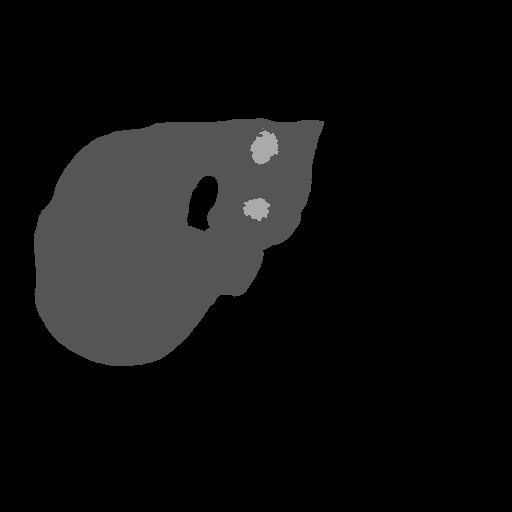

Selected patient is Patient N°039


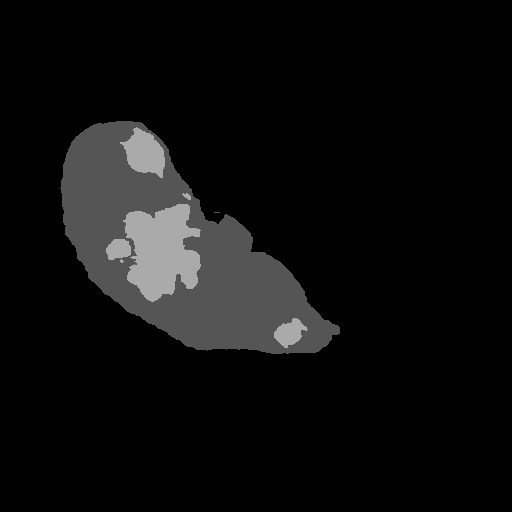

Selected patient is Patient N°009


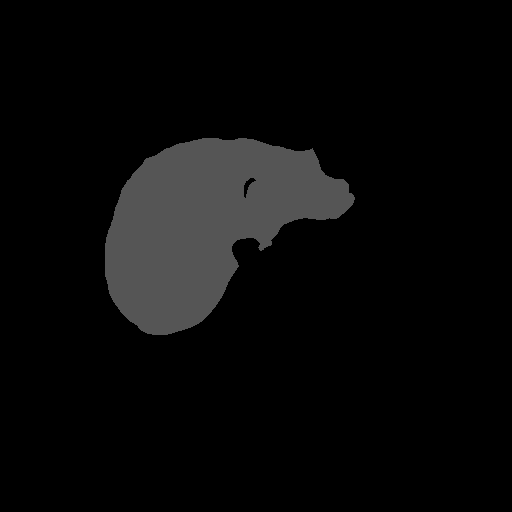

Selected patient is Patient N°052


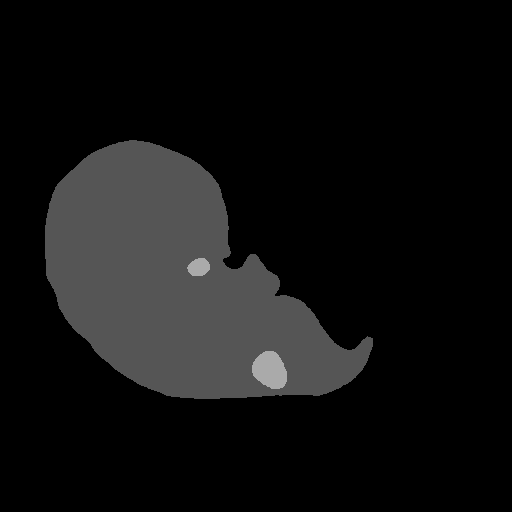

Selected patient is Patient N°013


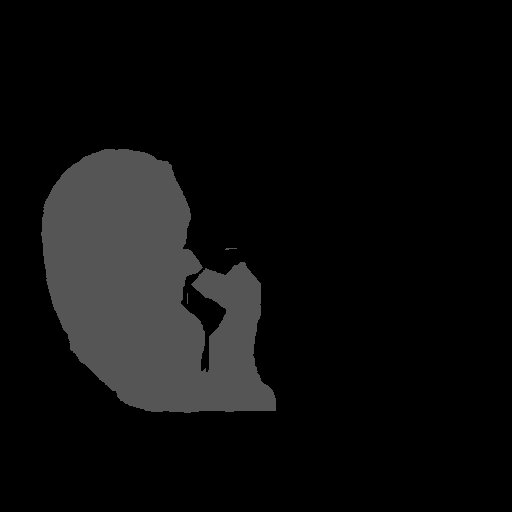

Selected patient is Patient N°100


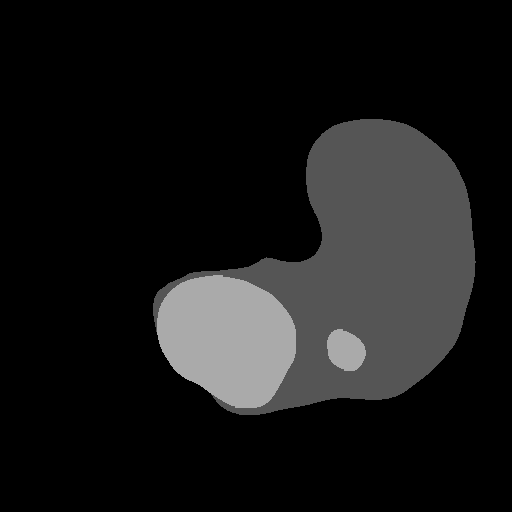

Selected patient is Patient N°055


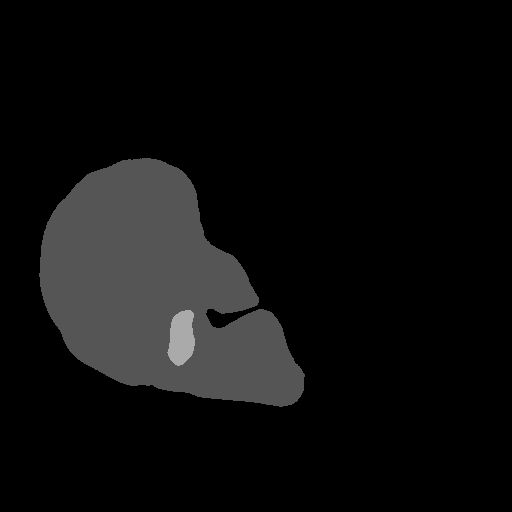

Selected patient is Patient N°087


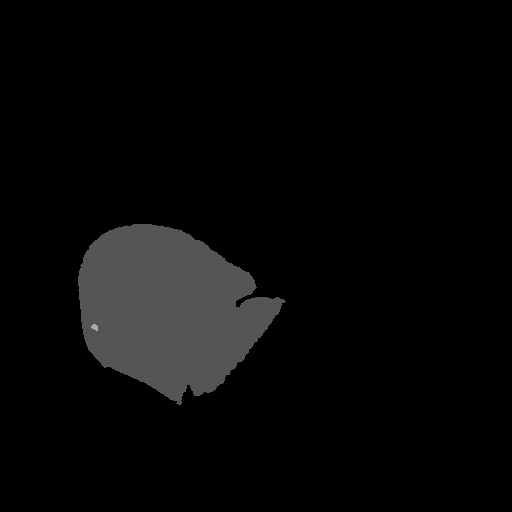

Selected patient is Patient N°120


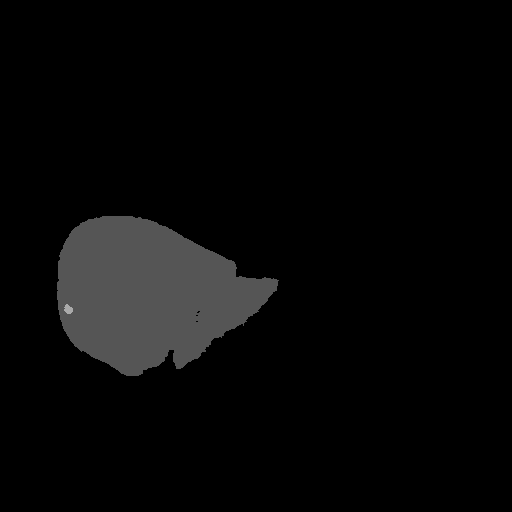

Selected patient is Patient N°129


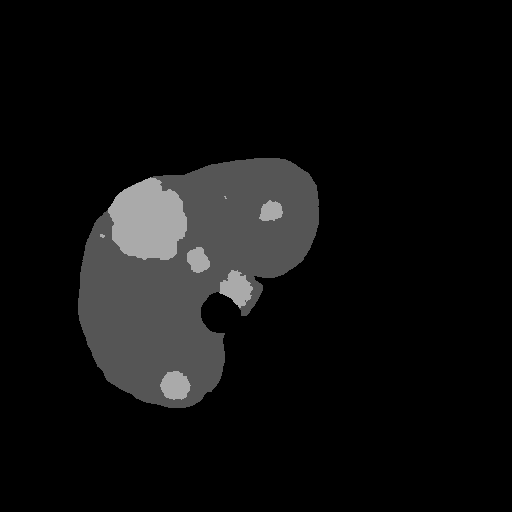

Selected patient is Patient N°117


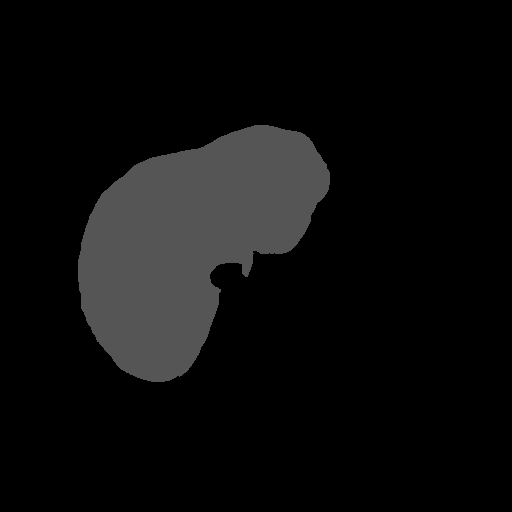

Selected patient is Patient N°128


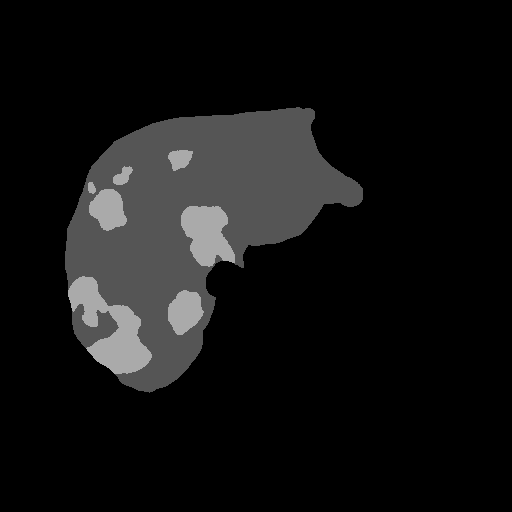

Selected patient is Patient N°070


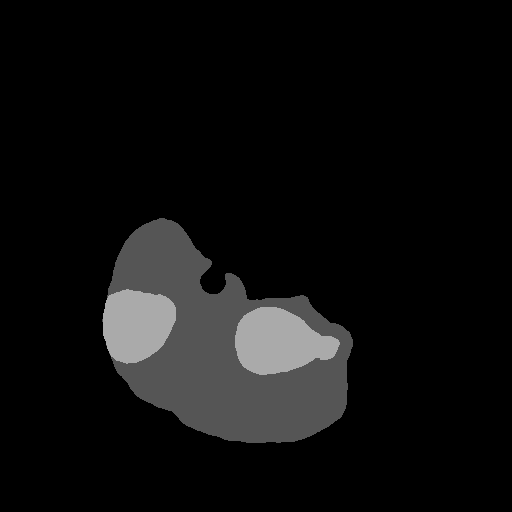

Selected patient is Patient N°021


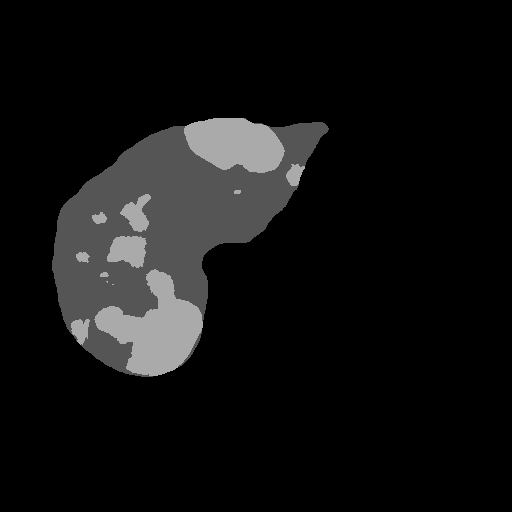

Selected patient is Patient N°053


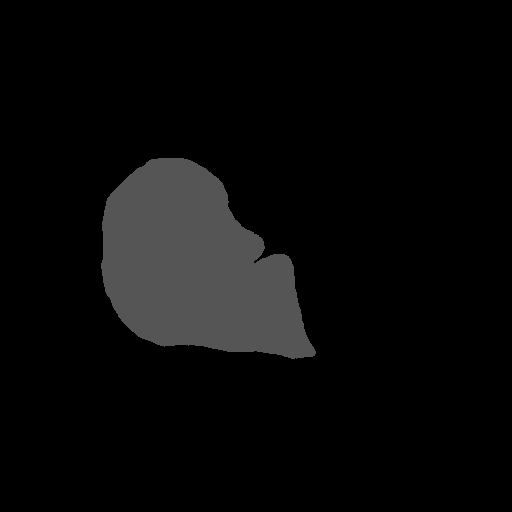

Selected patient is Patient N°101


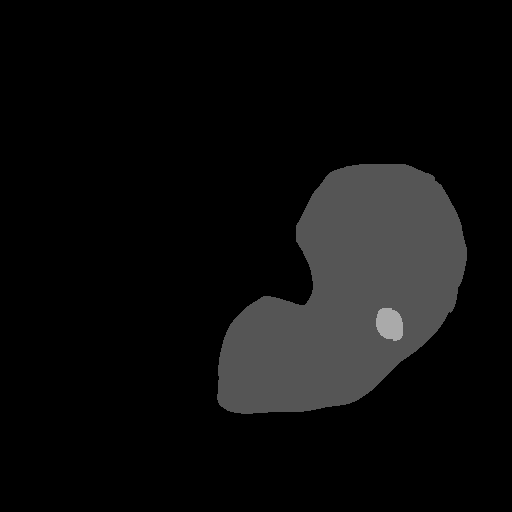

Selected patient is Patient N°019


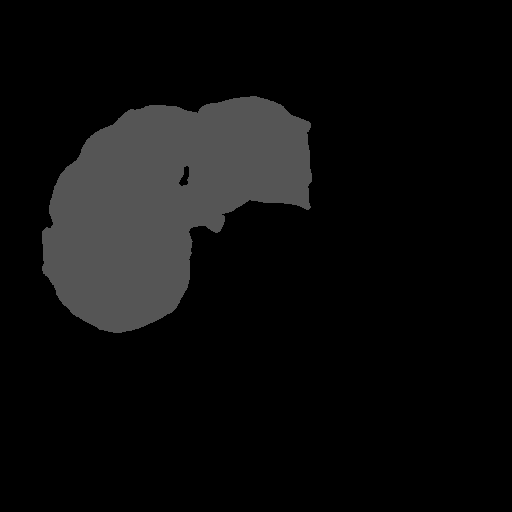

Selected patient is Patient N°023


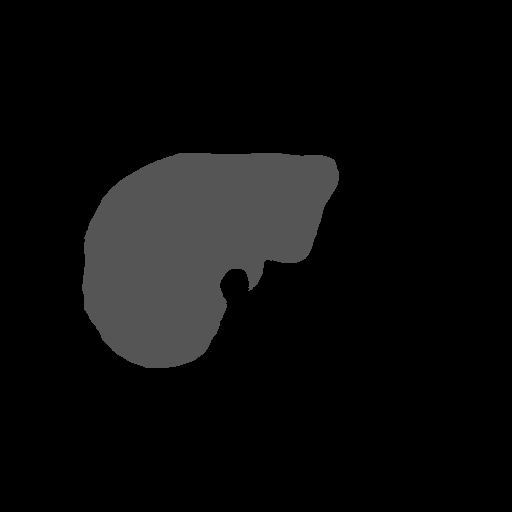

Selected patient is Patient N°112


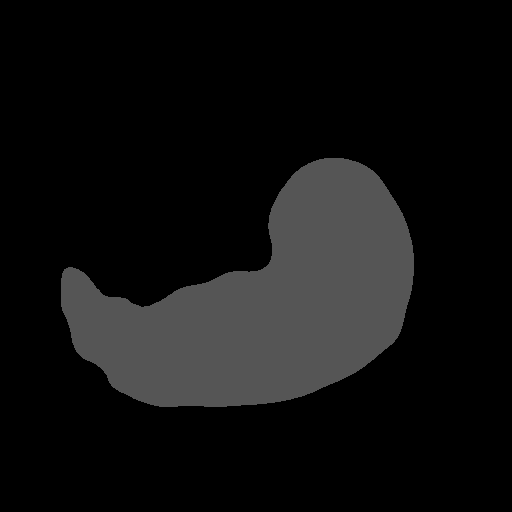

In [15]:
for PATIENT_ID in test_ids[:50]:
    print(f"Selected patient is Patient N°{PATIENT_ID:03d}")

    prediction = nib.load(os.path.join(DATA_PATH, "structured/patient{:03d}/mask.nii.gz".format(PATIENT_ID))).get_fdata()[:,:,:].transpose(2, 1, 0)
    #reconstruction = np.round(nib.load(os.path.join(DATA_PATH,"reconstructions/patient{:03d}/mask.nii.gz".format(PATIENT_ID))).get_fdata().transpose(2, 1, 0),2)

    mid_frame = np.argmax([np.average(prediction[i]) for i in range (prediction.shape[0] -1 )])

    display_image(prediction[mid_frame], PATIENT_ID, f'pred_patient_{PATIENT_ID:03d}.png')
    #display_image(reconstruction[mid_frame], PATIENT_ID, f'reconst_patient_{PATIENT_ID:03d}.png')
    #display_difference(reconstruction[mid_frame], prediction[mid_frame], PATIENT_ID, f'diff_patient_{PATIENT_ID:03d}.png')

Selected patient is Patient N°084


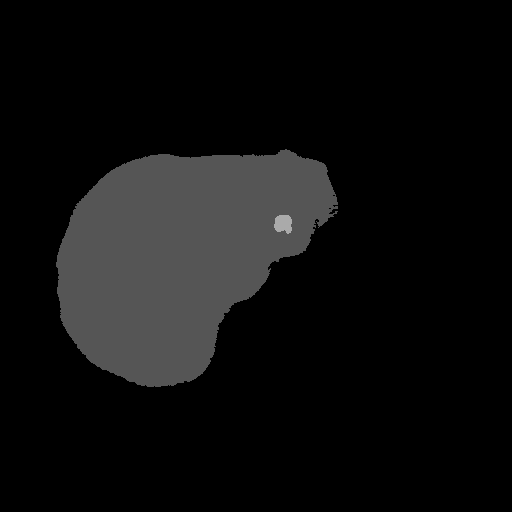

Selected patient is Patient N°045


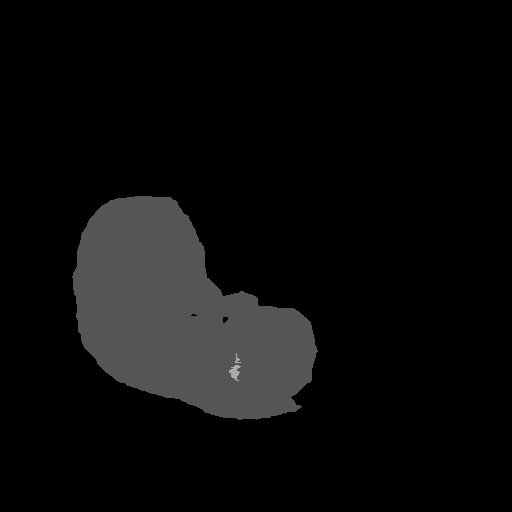

Selected patient is Patient N°057


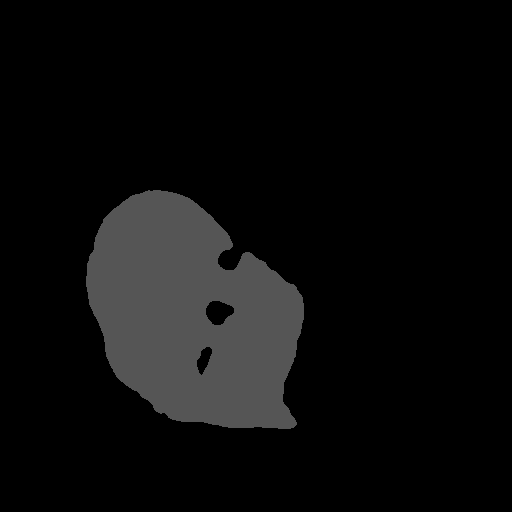

Selected patient is Patient N°082


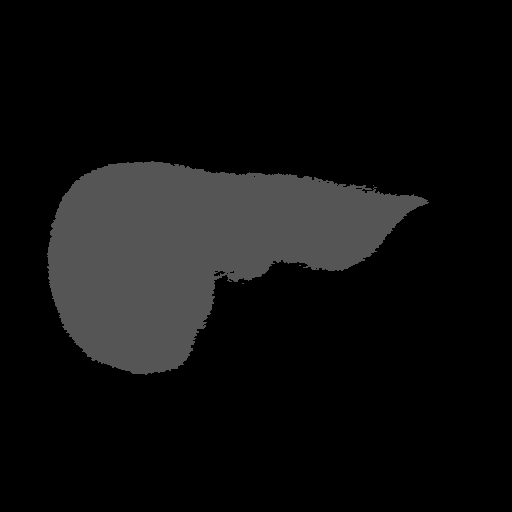

Selected patient is Patient N°122


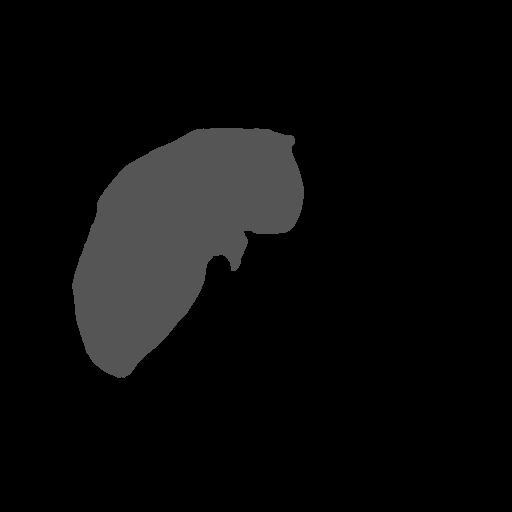

Selected patient is Patient N°062


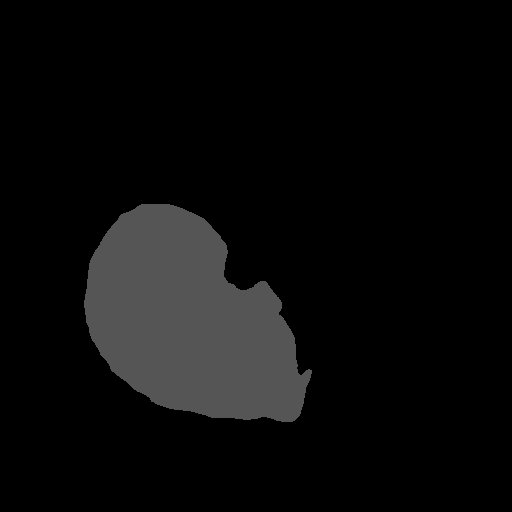

Selected patient is Patient N°036


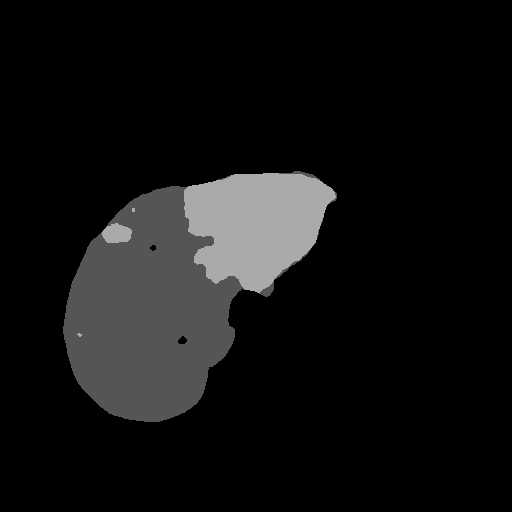

Selected patient is Patient N°119


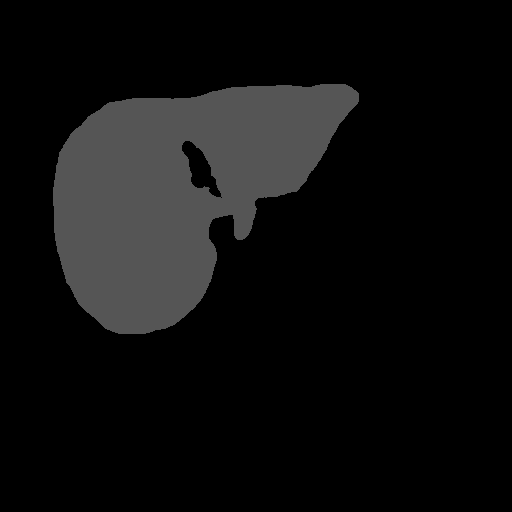

Selected patient is Patient N°026


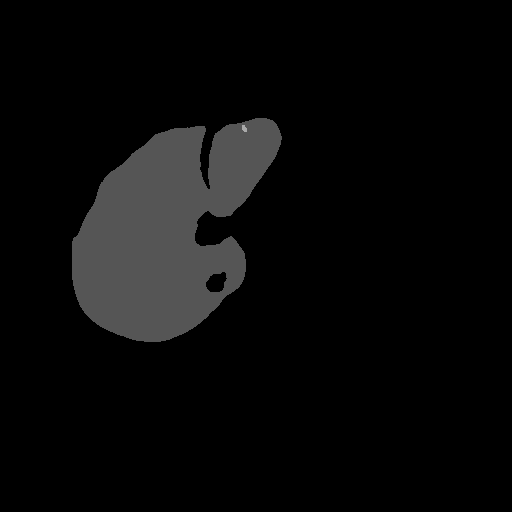

Selected patient is Patient N°058


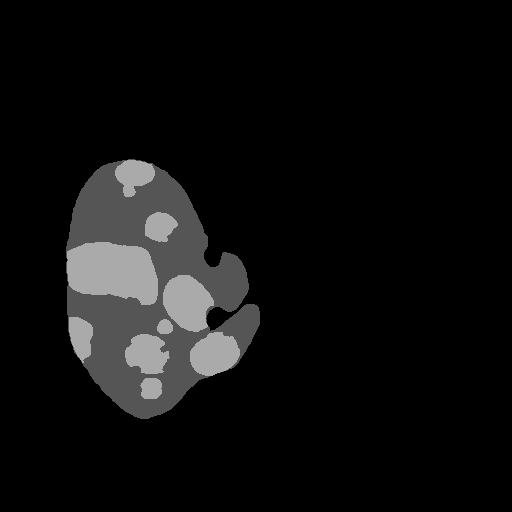

Selected patient is Patient N°041


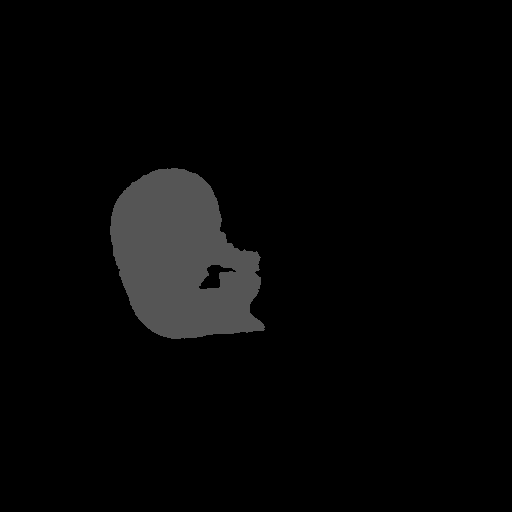

Selected patient is Patient N°067


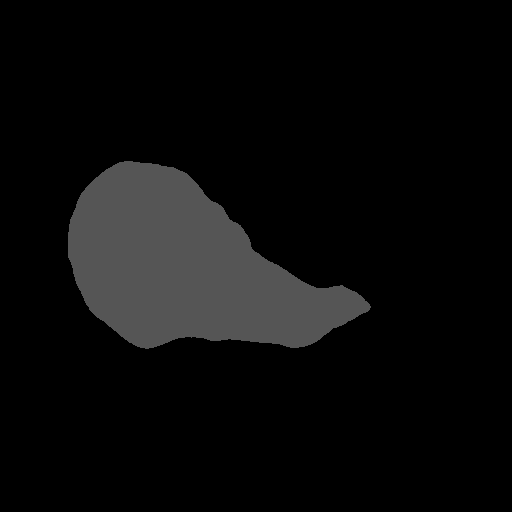

Selected patient is Patient N°127


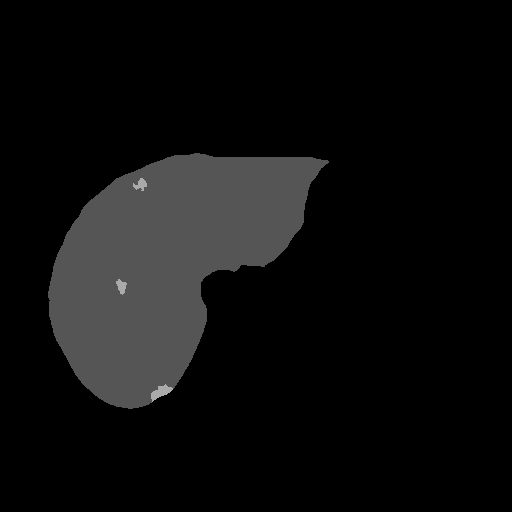

Selected patient is Patient N°130


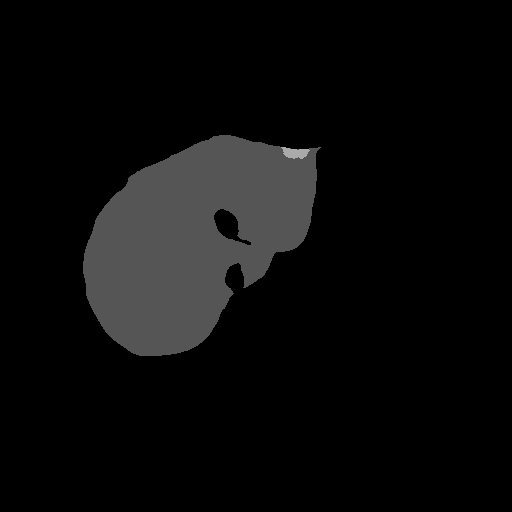

Selected patient is Patient N°086


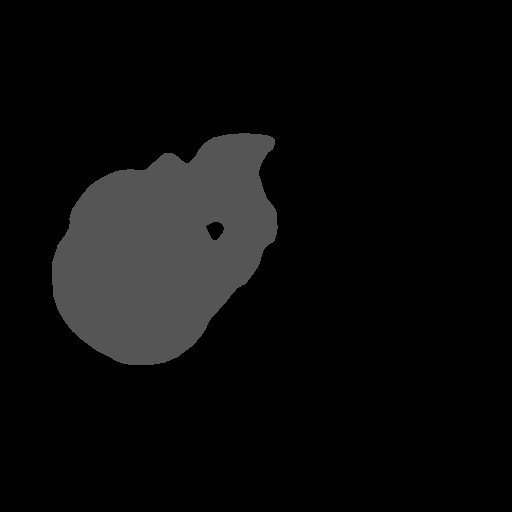

Selected patient is Patient N°050


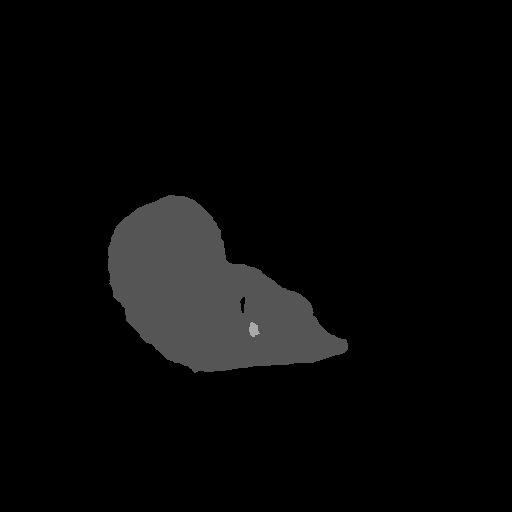

Selected patient is Patient N°049


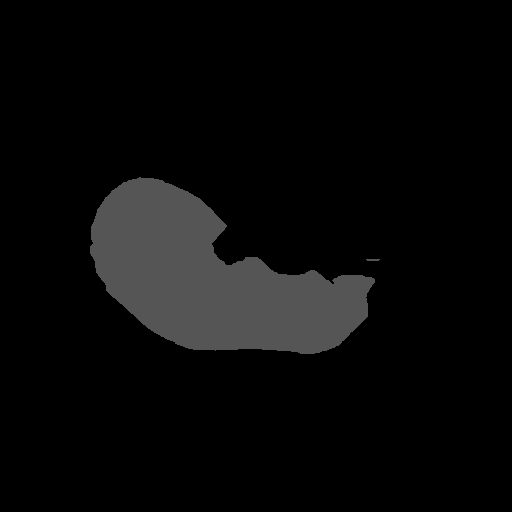

Selected patient is Patient N°113


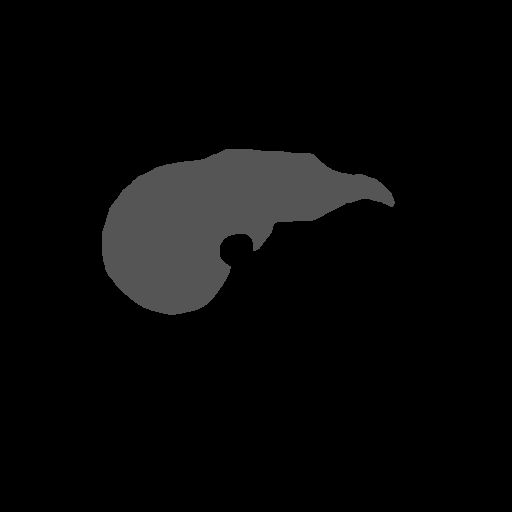

Selected patient is Patient N°022


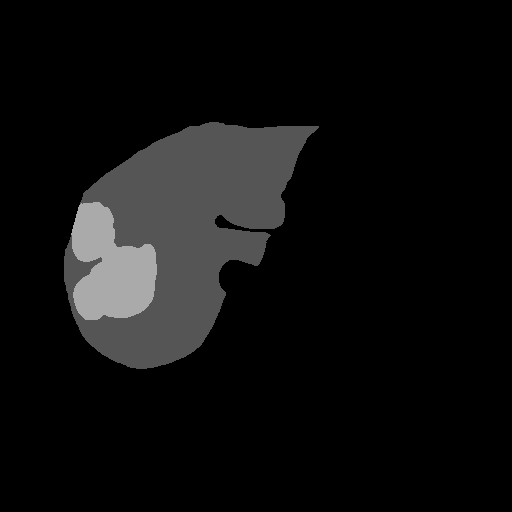

Selected patient is Patient N°099


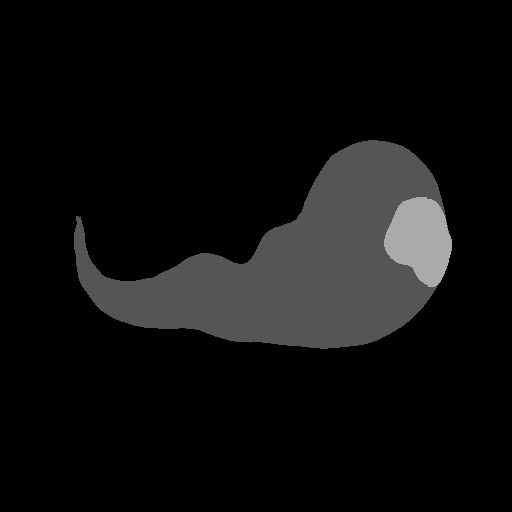

Selected patient is Patient N°106


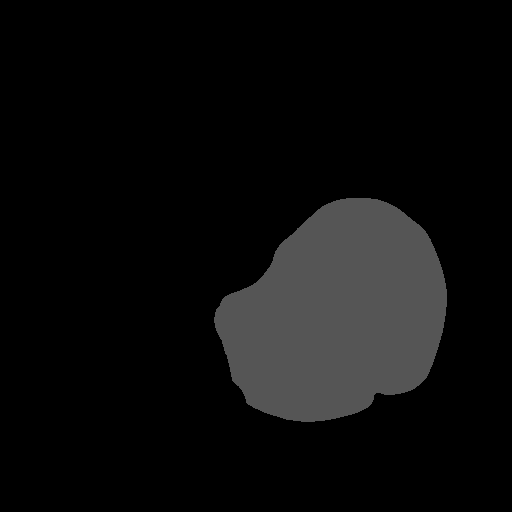

Selected patient is Patient N°124


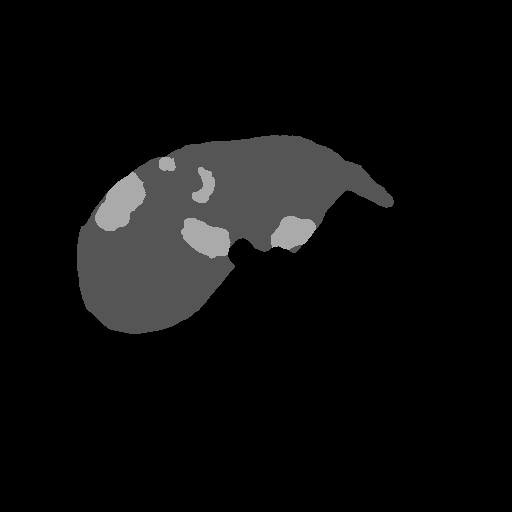

Selected patient is Patient N°123


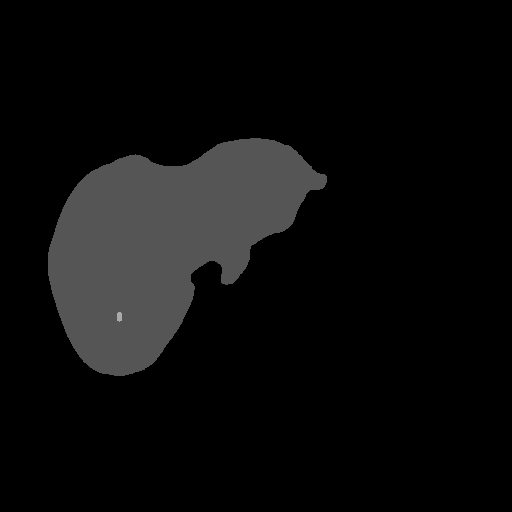

Selected patient is Patient N°089


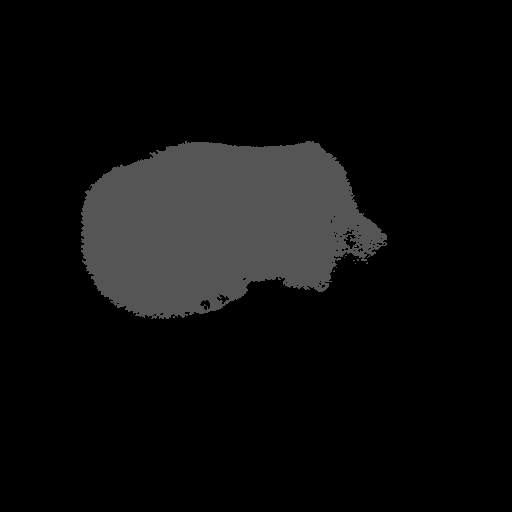

Selected patient is Patient N°030


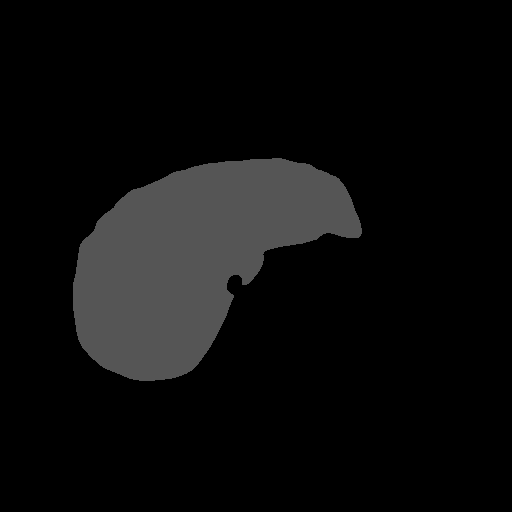

Selected patient is Patient N°017


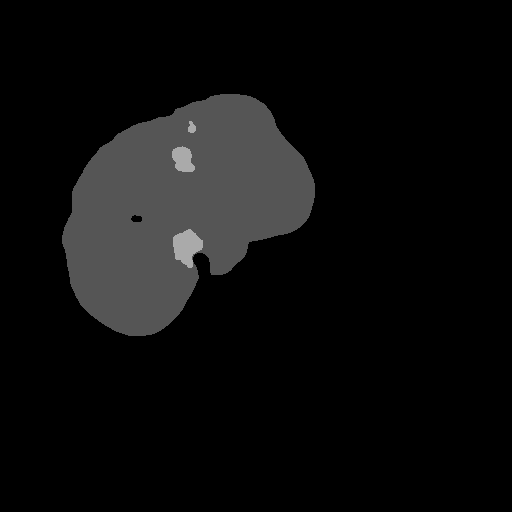

Selected patient is Patient N°073


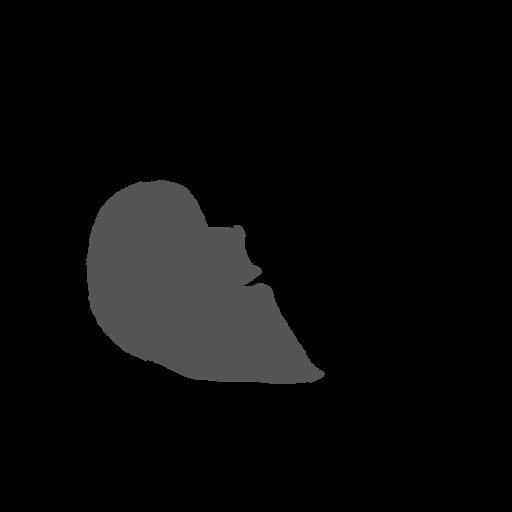

Selected patient is Patient N°006


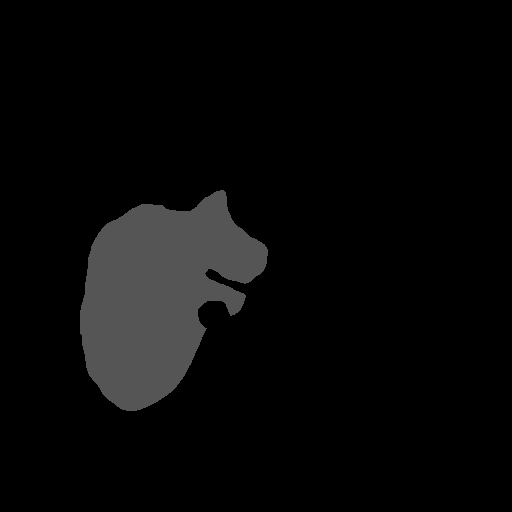

Selected patient is Patient N°094


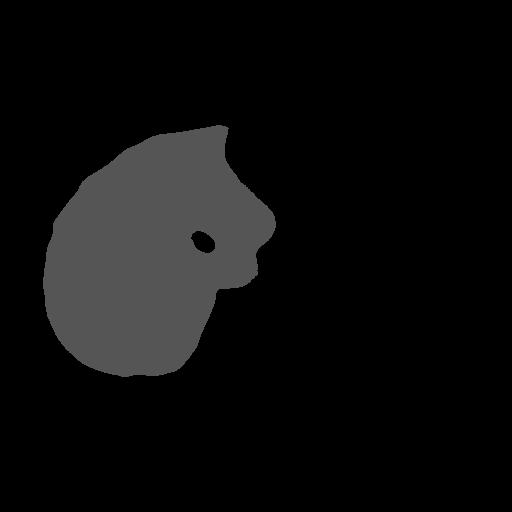

Selected patient is Patient N°031


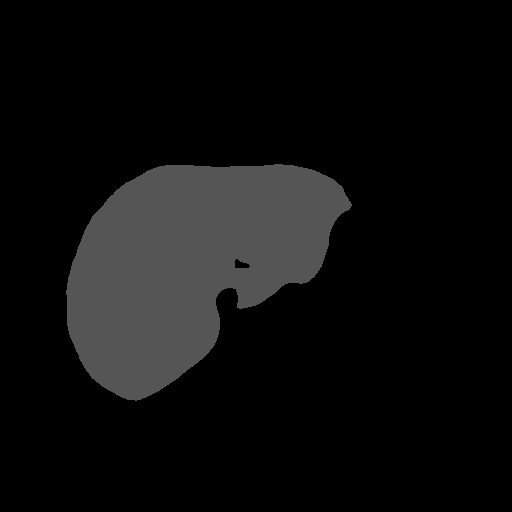

Selected patient is Patient N°096


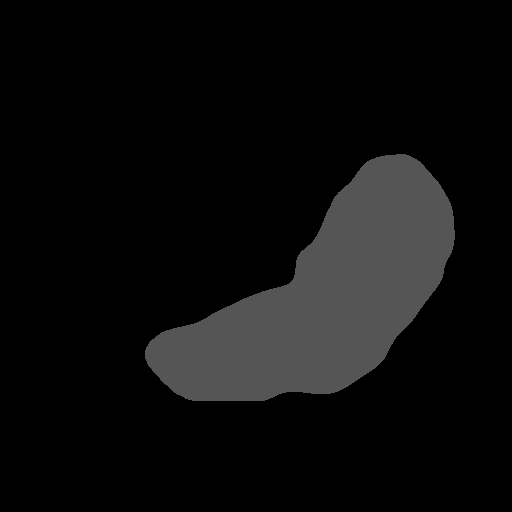

Selected patient is Patient N°079


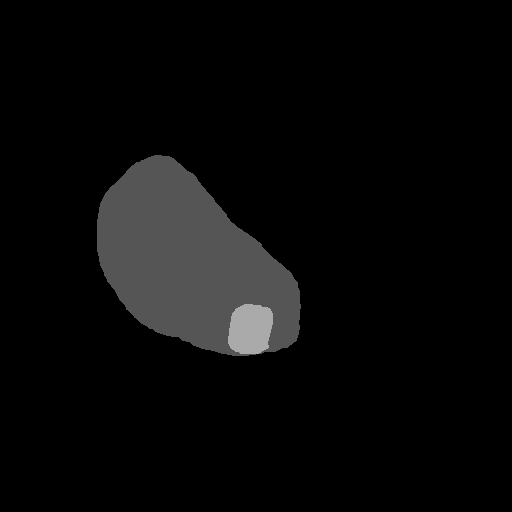

Selected patient is Patient N°075


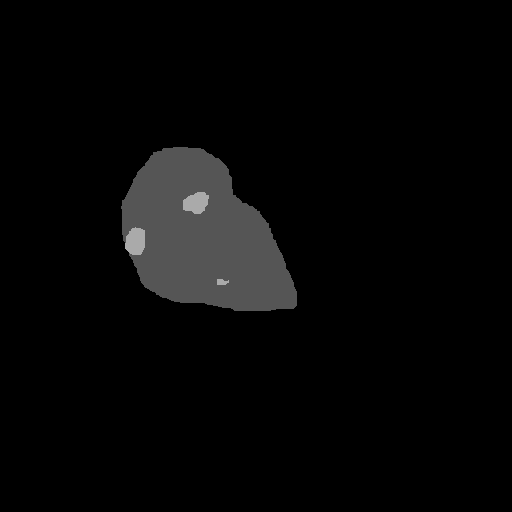

Selected patient is Patient N°069


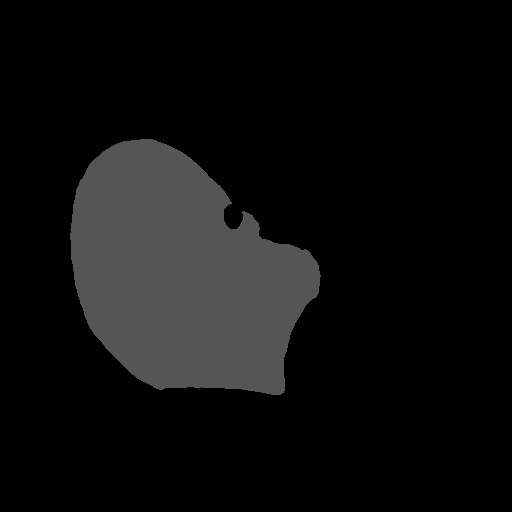

Selected patient is Patient N°077


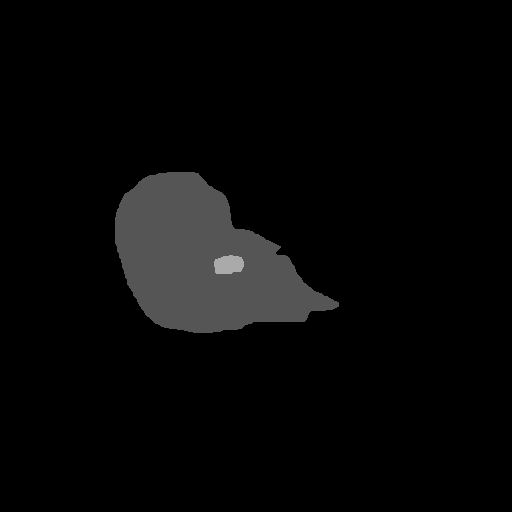

Selected patient is Patient N°111


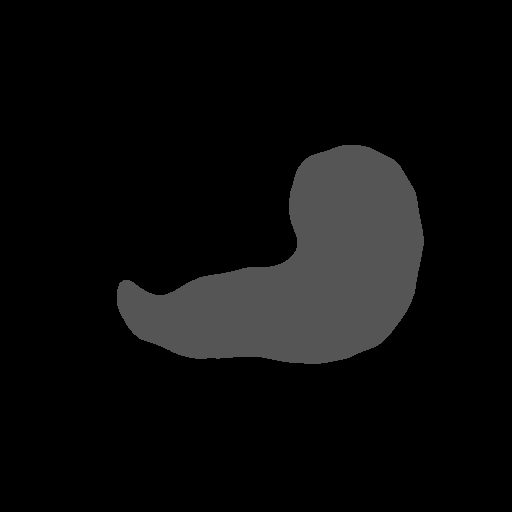

Selected patient is Patient N°081


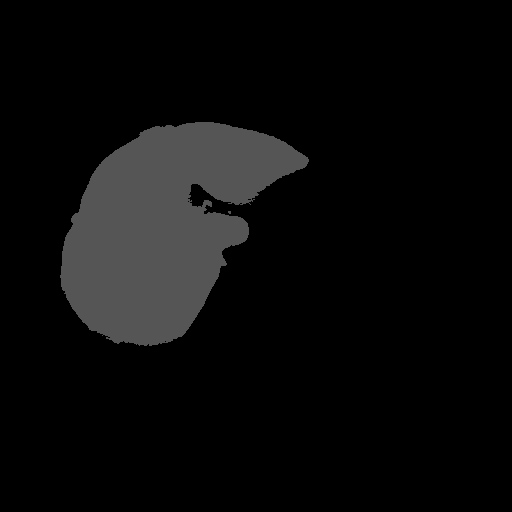

Selected patient is Patient N°042


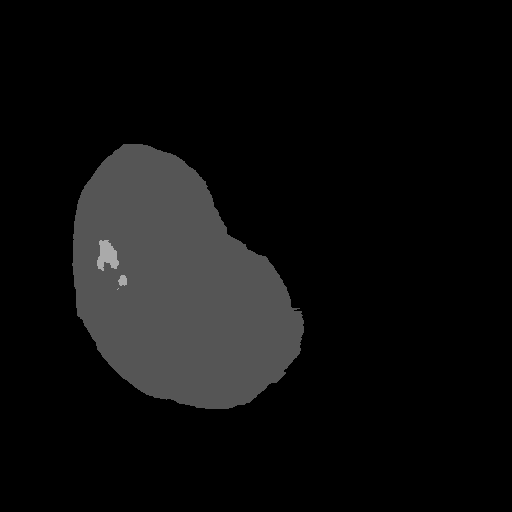

Selected patient is Patient N°109


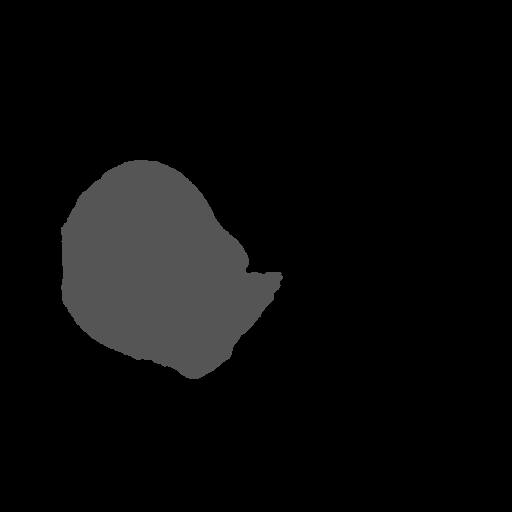

Selected patient is Patient N°074


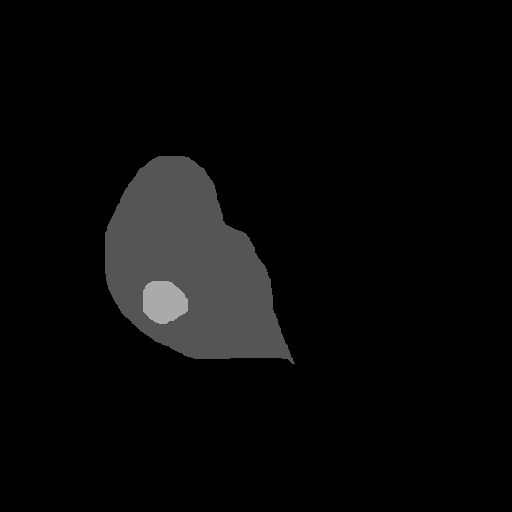

Selected patient is Patient N°060


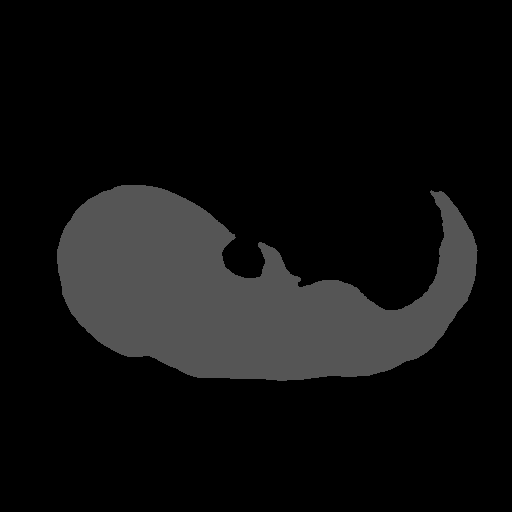

In [16]:
for PATIENT_ID in test_ids[50:]:
    print(f"Selected patient is Patient N°{PATIENT_ID:03d}")

    prediction = nib.load(os.path.join(DATA_PATH, "structured/patient{:03d}/mask.nii.gz".format(PATIENT_ID))).get_fdata()[:,:,:].transpose(2, 1, 0)
    #reconstruction = np.round(nib.load(os.path.join(DATA_PATH,"reconstructions/patient{:03d}/mask.nii.gz".format(PATIENT_ID))).get_fdata().transpose(2, 1, 0),2)

    mid_frame = np.argmax([np.average(prediction[i]) for i in range (prediction.shape[0] -1 )])

    display_image(prediction[mid_frame], PATIENT_ID, f'pred_patient_{PATIENT_ID:03d}.png')